/var/folders/bd/rn8my1zs30g5ml3258f07ft80000gn/T/ipykernel_49262/4240078168.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_probability = min(1, target_pdf(proposed_param) * proposal_pdf(current_param, proposed_param) /


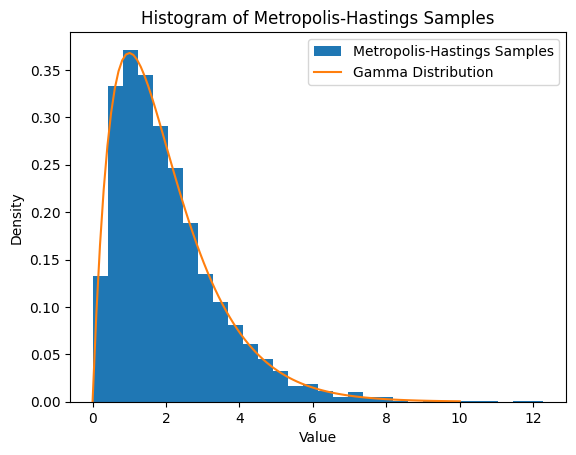

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def metropolis_hastings(target_pdf, proposal_dist, proposal_pdf, initial_param, iterations):
    current_param = initial_param
    samples = [current_param]
    
    for _ in range(iterations):
        proposed_param = proposal_dist(current_param)
        acceptance_probability = min(1, target_pdf(proposed_param) * proposal_pdf(current_param, proposed_param) /
                                     (target_pdf(current_param) * proposal_pdf(proposed_param, current_param)))
        
        if np.random.rand() < acceptance_probability:
            current_param = proposed_param
        
        samples.append(current_param)
    
    return samples

# Example target distribution: Normal distribution
def normal_pdf(x, mean=0, std_dev=1):
    return (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

# Example proposal distribution and pdf: Normal distribution centered at current parameter
def normal_proposal_dist(x, std_dev=1):
    return np.random.normal(x, std_dev)

def normal_proposal_pdf(x, y, std_dev=1):
    return normal_pdf(y, mean=x, std_dev=std_dev)

# Initial parameter
initial_param = 0

# Number of iterations
iterations = 10000

# Gamma distribution with k, theta f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}
alpha = 2
beta = 1
gamma = lambda x: (beta**alpha / np.math.gamma(alpha)) * x**(alpha - 1) * np.exp(-beta * x)

# Run Metropolis-Hastings
samples = metropolis_hastings(gamma, 
                              normal_proposal_dist, 
                              normal_proposal_pdf, 
                              initial_param, 
                              iterations)

# Plotting the results and gamma distribution
plt.hist(samples, bins=30, density=True, label="Metropolis-Hastings Samples")
plt.plot(np.linspace(0, 10, 100), gamma(np.linspace(0, 10, 100)), label="Gamma Distribution")
plt.title("Histogram of Metropolis-Hastings Samples")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()
